<div style="margin: 0 auto 30px; height: 60px; border: 2px solid gray; border-radius: 6px;">
  <div style="float: left;"><img src="img/epfl.png" /></div>
  <div style="float: right; margin: 20px 30px 0; font-size: 10pt; font-weight: bold;"><a href="https://moodle.epfl.ch/course/view.php?id=18253">COM202 - Signal Processing</a></div>
</div>
<div style="clear: both; font-size: 30pt; font-weight: bold; color: #483D8B;">
    Lab 3: Cooking with Sinusoids
</div>

In this notebook, we will try to look at another possible representation of a signal, directed towards frequency. 
\[finish summing up the goal of the lab\]. Hopefully by the end of this notebook, you will go from Linguini to Gusteau!
<div style="text-align:center">
<img src="https://64.media.tumblr.com/159a347844ee5f19c1a1ce4910b5208d/tumblr_nlkkg4zQFP1rwfctbo2_500.gifv" width=800 height=800>
</div>

To install ipywidgets (sometimes it does not show up)

- `pip install ipywidgets` 
- `jupyter nbextension enable --py widgetsnbextension`

In [1]:
# first our usual bookkeeping
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.io import wavfile
import IPython
from IPython.display import display

import sys
sys.path.append('helpers')
import plot

In [3]:
plt.rcParams["figure.figsize"] = (12,4)

# A dash of cosine, a sprinkle of sine, and just the right amount of amplitude!

**Task 1.1:** As a first exercise, fill in the function `sine` corresponding to $f(f, t) = sin(2 \pi  ft)$. Then assign the variable `my_sine` with a sine of frequency 1Hz to check if your function is correct: what does 1Hz mean? What should be the period of your sinusoid for a frequency of 1Hz? What should the amplitude be in our case?

*Hint*: We would like to have an array of $N$ samples for each second (so that 1 sample = 1/N seconds). We use the function `linspace`, which can be useful when dealing with signals. You can look online to understand what it does.  

**Task 1.2**: Try changing the value of $N$ from 1000 to 10, and then to 5. What happens? Why? 

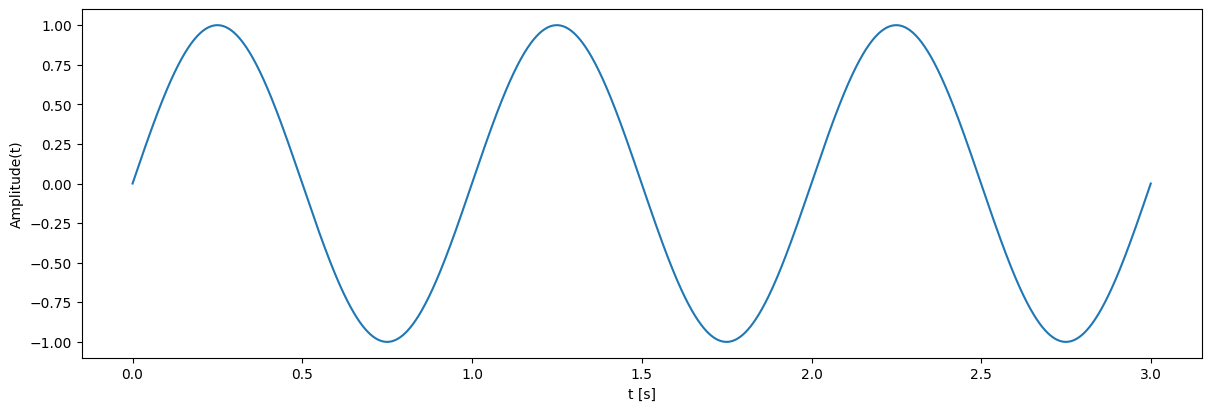

In [4]:
N = 1000 #number of samples per second
length = 3 #seconds
time = np.linspace(0, length, N*length)

def sine(t, f):
    return ... #Your code

my_sine =... #Your code

plot.tdplot(my_sine, N, "Amplitude", "My first sinusoid")

Now let's use our `sine` function as a basis to compute other functions. 

**Task 2:** : Implement the following functions in the cell bellow:
- $y_1(t) = 2sin(2\pi ft)$
- $y_2(t) = sin(2\pi ft) + sin(4\pi ft)$
- $y_3(t) = \frac{4}{\pi}sin(2\pi ft) +  \frac{4}{3\pi}sin(6\pi ft)$
- $y_4(t) = y_3(t) +  \frac{4}{5\pi}sin(10\pi ft) + \frac{4}{7\pi}sin(14\pi ft) + \frac{4}{9\pi}sin(18\pi ft) $

We are making you plot different functions based on sine so that you can see how adding sines might look like. And it is not THAT straightforward! Before running the cell to plot the $y_i$, try to imagine what they look like!

You might even recognize that $y_3$ and $y_4$ are very close, and look like something you might know if you were to draw it by hand: 

In [20]:
f = 20
N = 1000
length = 0.1 #seconds
t = np.linspace(0, length, int(N*length))

y1= ...
y2= ...
y3= ...
y4= ... 

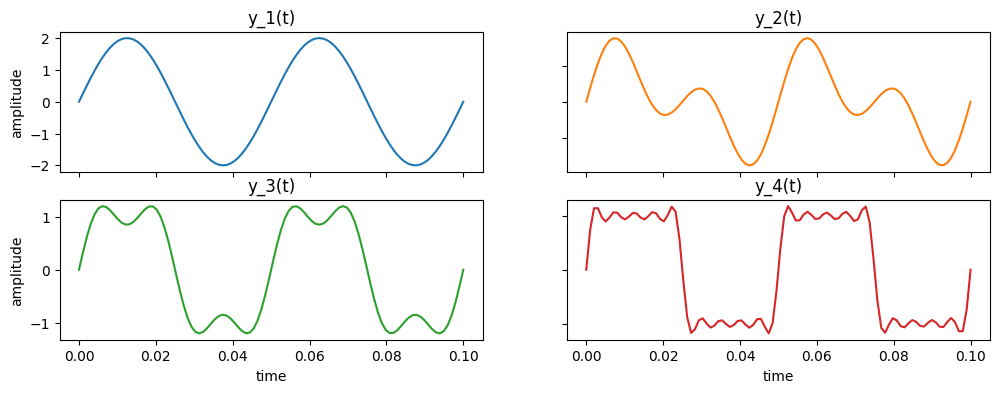

In [24]:
# run this cell to plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t, y1)
axs[0, 0].set_title('y_1(t)')
axs[0, 1].plot(t, y2, 'tab:orange')
axs[0, 1].set_title('y_2(t)')
axs[1, 0].plot(t, y3, 'tab:green')
axs[1, 0].set_title('y_3(t)')
axs[1, 1].plot(t, y4, 'tab:red')
axs[1, 1].set_title('y_4(t)')

for ax in axs.flat:
    ax.set(xlabel='time', ylabel='amplitude')
for ax in axs.flat:
    ax.label_outer()
    
plt.show()


<div style="text-align:center">
<img src="https://media.giphy.com/media/5Wyv8urxxclm8/giphy.gif" width=500 height=500>
</div>

## Now that you have seen how we can create different functions by summing sinusoids, let us get a bit more technical!
Remember Euler's equality : 
<p style="text-align: center;">$sin(2 \pi ft) = \frac{e^{j 2 \pi f t} - e^{-j 2 \pi f t}}{2j}$ </p>



Similar to cooking, where *fresh* ingredients make all the difference instead of using *pre-made* dishes, we can break down each of our sinusoids even further to use the raw and flavorful complex exponentials! By switching to complex exponentials, we can cook up complex signals with even more freedom and creativity in our signal kitchen! Let us rewrite $y_4$ (you might have recognized the square wave function):

**Recipe for a square wave** (using pre-made ingredients!)
- $\frac{4}{\pi}$ of a  sinusoids with frequency $f$
- $\frac{4}{3\pi}$ of a sinusoids with frequency $3f$
- ...

**Recipe for a square wave (revised)** (using fresh ingredients!)
- $\frac{4}{\pi}$ of a complex exponential with frequency $f$ 
- $\frac{4}{\pi}$ of a complex exponential with frequency $-f$
- $\frac{4}{3\pi}$ of a complex exponential with frequency $3f$ 
- $\frac{4}{3\pi}$ of a complex exponential with frequency $-3f$
- ...


We will return to cooking in a second, but if we wanted to represent this function by showing how much of "one" type of complex exponential we have, we could even make some type of box function as such:

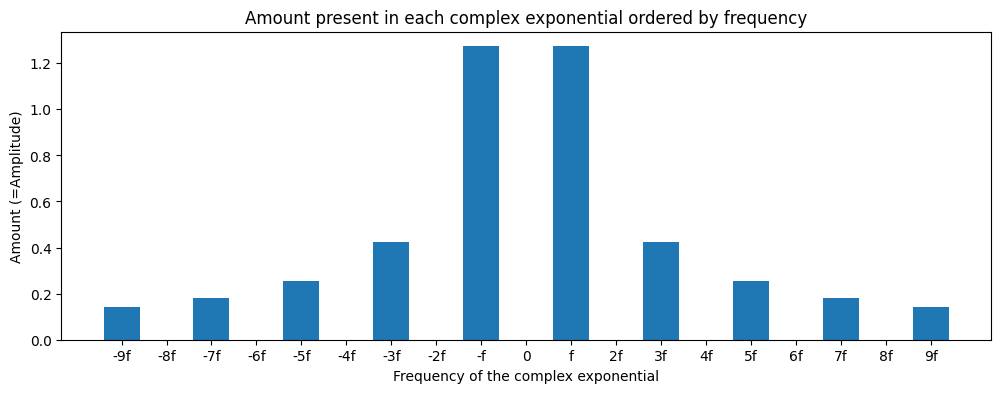

In [25]:
frequency = ['-9f', '-8f', '-7f', '-6f', '-5f', '-4f', '-3f', '-2f', '-f', '0','f','2f', '3f', '4f', '5f', '6f', '7f', '8f', '9f']
magnitude = [(4/(9*np.pi)),0,(4/(7*np.pi)),0,(4/(5*np.pi)),0,(4/(3*np.pi)),0,(4/np.pi),0,(4/np.pi), 0,(4/(3*np.pi)), 0,(4/(5*np.pi)), 0,(4/(7*np.pi)), 0,(4/(9*np.pi))]#lmao change this to correct form
plt.bar(frequency,magnitude)
plt.title('Amount present in each complex exponential ordered by frequency')
plt.xlabel('Frequency of the complex exponential')
plt.ylabel('Amount (=Amplitude)')
plt.show()

Since our goal is to show what is a Fourier transform, run the cell bellow to see a glimpse before we explain what the Fourier transform of the "real" box function is:

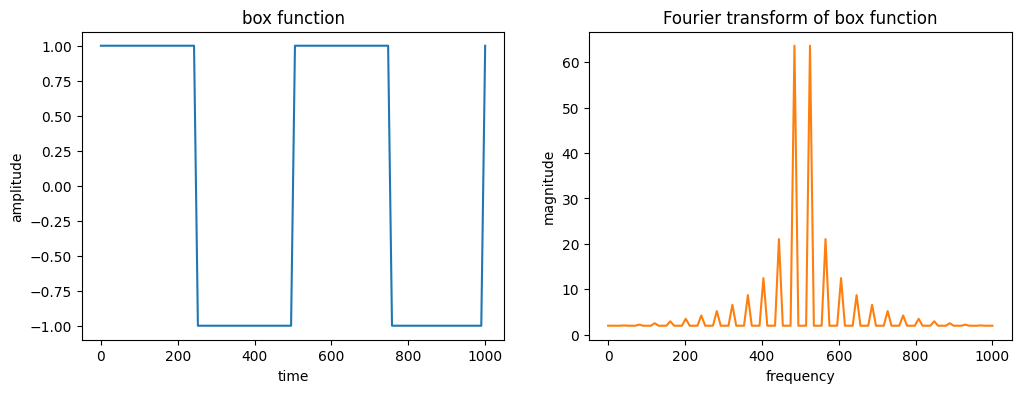

In [26]:
t = np.linspace(0, 1000,100)
f = 20
real_box = signal.square(2 * np.pi * f * t)
fourier_transform = np.abs(np.fft.fftshift(np.fft.fft(real_box)))

fig, axs = plt.subplots(1, 2)
axs[0].plot(t, real_box)
axs[0].set_title('box function')
axs[1].plot(t, fourier_transform, 'tab:orange')
axs[1].set_title('Fourier transform of box function')

for ax in axs.flat:
    axs[0].set(xlabel='time', ylabel='amplitude')
    axs[1].set(xlabel='frequency', ylabel='magnitude')

Odly similar to our bar plot isn't it? 

**Task 3.1**: Try to explain in your own terms what you think the Fourier transform quantifies. 

# A whole new flavor of signal processing: the change of basis!

Let us recap what we have done so far: we can represent a signal as a function of its frequencies, by counting *how much one complex exponential with some frequency is present*. When we represent the function like in our bar plot, we say that we are in the **frequency domain**. When we represent the function as we usually do, as a function of time, then we are in the **time domain**. 

**Task 3.2**: How do we get from the frequency domain to the time domain (if you don't know, review the past steps)?

We can easily go from the frequency domain (bar plot) to the time domain by *summing the different complex exponentials* with their corresponding coefficients. **But how do we get from the time domain to the frequency domain?**

## Linear algebra for functions

We can use functions just like vectors in linear algebra (if you think about it, both are just a collection of points!). From the previous lab, remember that given a basis of N vectors $\{\textbf{w}^{(k)}\}_{k=0, 1, ..., N-1}$ we can write any vector $\textbf{x}$ as $\textbf{x} = \sum^{N-1}_{k=0} \alpha_k \textbf{w}^{(k)}$.

For us, the basis $\{\textbf{w}^{(k)}\}$  is called the **Fourier oscillatory basis**, namely $w_n^{(k)} = e^{j\frac{2 \pi}{N} nk}$ ($n$ in subscript represents the index in the vector). For now, we will just admit that this base is orthogonal (you will see all the details in class, but let us focus on interpretation for now). 

*Remark: Our Fourier oscillatory basis strangely resembles something we have already used... Do you see it yet?*






<div style="text-align:center">
<img src="https://media.giphy.com/media/nJ2PObJA3EVgc/giphy.gif" width="500" height="500">
</div>

You got it correct! If you did not: our Fourier oscillatory *basis corresponds* to the basic ingredients that we used in our cooking recipe to go from **frequency domain** to **time domain**! 

In fact this gives us our first formula: the **Inverse Fourier Transform**

<p style="text-align: center;">$x[n] = \frac{1}{N} \sum^{N-1}_{k=0} X[k] e^{j \frac{2 \pi}{N} nk}$, with   $n= 0 , 1, ..., N-1$</p>


with $x[n]$ our function in the time domain, and $X[k]$ our function in the frequency domain (which acts like coefficients). 


### But what about the actual Fourier transform? 

Well it is the change of basis in the other way! You will demonstrate this in class, but the basis used is almost the same. 
<p style="text-align: center;">$X[k] = \sum^{N-1}_{n=0} x[n] e^{-j \frac{2\pi}{N}nk}$, with $k = 0, 1, ..., N-1$</p>

**Task 4:** : Find out which note is the guitar playing. 
For this, fill in the functions `fourier_transform` and `important_frequency`.

- `fourier_transform`: implement the formula. You might want to use previously seen numpy functions such as `np.sum`, `np.exp`, `np.arange` to implement it quickly
- `important_frequency`: when dealing with fourier transform, we can study two components: phase and magnitude. The magnitude represents "how much of this complex exponential we have", therefore we want to get the highest. You might want to use functions such as `np.argmax` and `np.abs`.

Once you are done, you can check the website https://pages.mtu.edu/~suits/notefreqs.html to check your perfect ear and see if you got the correct note! Keep in mind that you need to look for the closest frequency (it might not be exact). 

In [27]:
# Exercise: from this audio, find out what the frequencies are
fs, data = wavfile.read("data/string_guitar.wav")
data = data.T 
IPython.display.Audio(data=data, rate=fs, embed=True)

/tmp/ipykernel_20074/636226796.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read("data/string_guitar.wav")


In [ ]:
#Your code
def fourier_transform(N, x_n, k):
    n = ... #create the samples indices
    transform = ... 
    return transform

def important_frequency(X_k, f_axis):
    return ...


#Test your functions on a piece of the guitar and compare with the fft algorithm. 
#Be careful! You cannot process too many samples at once, but why is that?

x_n = ... #Your code
X_f, f_axis = plot.fdplot(x_n, fs, "x", "Guitar audio")
print(f"The frequency of the guitar is {important_frequency(X_f, np.abs(f_axis)): .2f}") 

# Plotting the DFT: the icing on the cake

Let us recap what we have seen so far: we have two spaces namely the frequency domain and the time domain to represent a function. Each domain has its own base, and we can represent a signal using a basis extension, just like we do for vectors! We can also go from one domain to another by changing basis. To go from time to frequency domain, we use the Fourier transform, and to go from frequency to time domain the inverse fourier transform. 

Now that you understand how we represent functions in the frequency domain, you can play with the code below:

In [29]:
import ipywidgets as widgets

# define the sampling frequency and duration
fs = 10000  # sampling frequency
duration = 0.1  # duration in seconds

# define the time array
t = np.arange(0, duration, 1/fs)

def plot_exponentials(freq1, freq2, freq3, amp1, amp2, amp3, show_exp1, show_exp2, show_exp3):
    y = np.zeros(len(t), dtype=complex)
    if show_exp1:
        y += amp1*np.exp(2j*np.pi*freq1*t)
    if show_exp2:
        y += amp2*np.exp(2j*np.pi*freq2*t)
    if show_exp3:
        y += amp3*np.exp(2j*np.pi*freq3*t)
    plot.fdplot(y, fs, 'y', 'sum of exponentials')

freq1_slider, amp1_slider, show_exp1_checkbox, freq2_slider, amp2_slider, show_exp2_checkbox, freq3_slider, amp3_slider, show_exp3_checkbox = plot.create_sliders()
tabs = plot.organize_tab(freq1_slider, amp1_slider, show_exp1_checkbox, freq2_slider, amp2_slider, show_exp2_checkbox, freq3_slider, amp3_slider, show_exp3_checkbox)

# create the final widget with the tab and output
widget = widgets.VBox([tabs, widgets.interactive_output(plot_exponentials, {
    'freq1': freq1_slider,
    'freq2': freq2_slider,
    'freq3': freq3_slider,
    'amp1': amp1_slider,
    'amp2': amp2_slider,
    'amp3': amp3_slider,
    'show_exp1': show_exp1_checkbox,
    'show_exp2': show_exp2_checkbox,
    'show_exp3': show_exp3_checkbox
})])

# display the widget
display(widget)

**Task 5**: 
- What happens when you show another exponential? 
- What happens if you put two exponentials at the same frequency? 
- What happens for the orange line if you have one exponential at frequency $f$ and the other one at frequency $-f$? Why is that the case? What does the Fourier transform look like, and what property does it have?
- What happens if you change the amplitude of an exponential? 

### And **voila**! You are now a Fourier transform chef!

<div style="text-align:center">
<img src="https://media.giphy.com/media/2s7lb48XP0yje/giphy.gif" width="600" height="600">
</div>
